# Part 1: Mini Project - Movie Database Analysis
## UCSanDiegoX: DSE200x: Python for Data Science

Please note that **you will need to download the dataset**. 

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 



## Data Import

The following section imports the three datasets needed as well as displays the count of records in each database as well as the head (first few rows) of each for a quick view into the data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('../Week-4-Pandas/movielens/movies.csv', sep=',')
movies.count()

movieId    27278
title      27278
genres     27278
dtype: int64

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('../Week-4-Pandas/movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.count()

userId       20000263
movieId      20000263
rating       20000263
timestamp    20000263
dtype: int64

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


## Data Analysis

First let's look at the popularity of Genre's over time (by count)

In [6]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [7]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### Clean Up the Data

* Convert the Year to a number
* Clean out any null values

In [8]:
# convert column "a" of a DataFrame
# df["a"] = pd.to_numeric(df["a"])

movies['year'] = pd.to_numeric(movies['year'],errors='coerce',downcast='integer')

In [9]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [10]:
movies['year'].isnull().any()

True

In [11]:
movies.dropna()
movies.count()

movieId    27278
title      27278
genres     27278
year       27255
dtype: int64

### Check to See the Top 5 Genres

This will allow us to simplify the visualization

In [12]:
# https://stackoverflow.com/questions/54281070/
#in-a-pandas-dataframe-column-how-can-i-count-the-values-if-the-cells-contents

# This method works but is a little slower than the next one. But it's sorted!
genre_count = movies['genres'].str.split('|', expand=True).stack().value_counts()
genre_count

Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
dtype: int64

## Get New Columns for Popular Genres - Option #1

**This method will cast a new cloum for each genre inplace as a boolean.**

Here we're going to see if there are any trends over time relative to genres.  Speficially `comedy`, `action`, and `drama`.

In [13]:
movies['Drama'] = movies['genres'].str.contains('Drama')
movies['Comedy'] = movies['genres'].str.contains('Comedy')
movies['Thriller'] = movies['genres'].str.contains('Thriller')
movies['Romance'] = movies['genres'].str.contains('Romance')
movies['Action'] = movies['genres'].str.contains('Action')

In [14]:
movies.head(15)

,movieId,title,genres,year,Drama,Comedy,Thriller,Romance,Action
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,False,True,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,False,True,False,True,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,True,True,False,True,False
4,5,Father of the Bride Part II (1995),Comedy,1995.0,False,True,False,False,False
5,6,Heat (1995),Action|Crime|Thriller,1995.0,False,False,True,False,True
6,7,Sabrina (1995),Comedy|Romance,1995.0,False,True,False,True,False
7,8,Tom and Huck (1995),Adventure|Children,1995.0,False,False,False,False,False
8,9,Sudden Death (1995),Action,1995.0,False,False,False,False,True
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995.0,False,False,True,False,True


## Create a New Table Summarizing the Values by Year

* Here we're going to group by the years - Since 1975
* This is also removing the last two years from the dataset since it seemed to be less complete

In [58]:
by_year = movies.groupby("year",as_index=False).sum()
by_year = by_year[-41:-2]
by_year.head()

,year,movieId,Drama,Comedy,Thriller,Romance,Action
77,1975.0,11723571,93.0,54.0,30.0,27.0,30.0
78,1976.0,11764204,95.0,56.0,39.0,15.0,40.0
79,1977.0,11264050,95.0,50.0,31.0,18.0,27.0
80,1978.0,10319068,79.0,59.0,29.0,15.0,34.0
81,1979.0,10662929,97.0,59.0,22.0,19.0,34.0


In [59]:
total_films = movies.groupby("year",as_index=False).count()
total_films = total_films[-41:-2]
total_films.head()

,year,movieId,title,genres,Drama,Comedy,Thriller,Romance,Action
77,1975.0,196,196,196,196,196,196,196,196
78,1976.0,199,199,199,199,199,199,199,199
79,1977.0,198,198,198,198,198,198,198,198
80,1978.0,192,192,192,192,192,192,192,192
81,1979.0,201,201,201,201,201,201,201,201


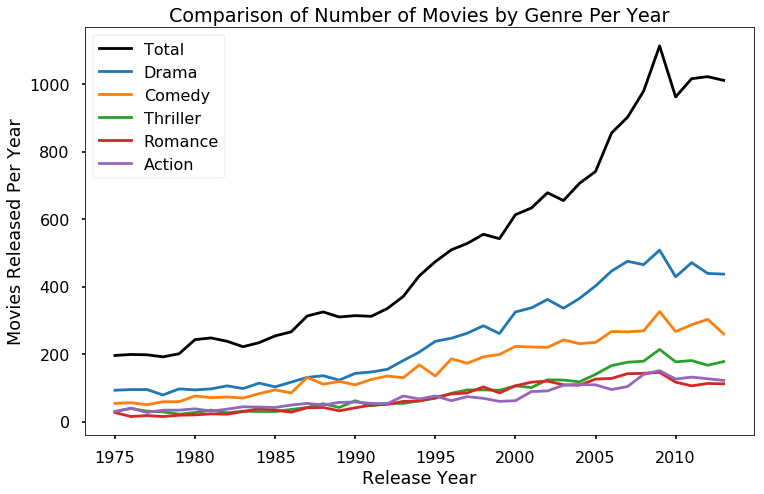

In [113]:
plt.figure(figsize=(12, 7.5))
# print(plt.style.available)
plt.style.use('seaborn-poster')

# Leave the first row uncommented if you want to display the total
plt.plot(total_films['year'], total_films['title'], label='Total', color='black')
plt.plot(by_year['year'], by_year['Drama'], label='Drama')
plt.plot(by_year['year'], by_year['Comedy'], label='Comedy')
plt.plot(by_year['year'], by_year['Thriller'], label='Thriller')
plt.plot(by_year['year'], by_year['Romance'], label='Romance')
plt.plot(by_year['year'], by_year['Action'], label='Action')


plt.xlabel('Release Year')
plt.ylabel('Movies Released Per Year')
plt.title("Comparison of Number of Movies by Genre Per Year")
plt.legend()

plt.show()

### Similar chart with Total on the secondary axis

This is about the same thing yet trying to plot the total on the right to smooth out the graph.

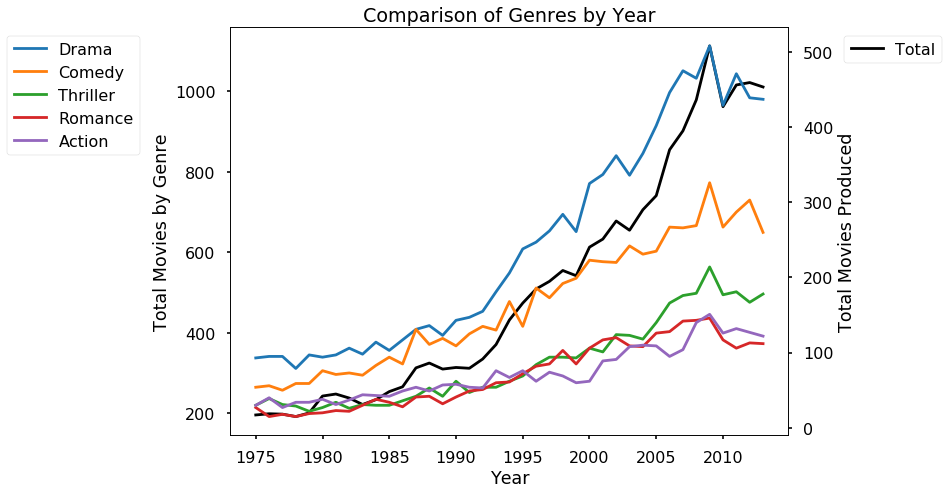

In [61]:
fig, ax1 = plt.subplots(figsize=(10, 7.5))

ax1.plot(total_films['year'], total_films['title'], label='Total', color='black')

ax2 = ax1.twinx() 

ax2.plot(by_year['year'], by_year['Drama'], label='Drama')
ax2.plot(by_year['year'], by_year['Comedy'], label='Comedy')
ax2.plot(by_year['year'], by_year['Thriller'], label='Thriller')
ax2.plot(by_year['year'], by_year['Romance'], label='Romance')
ax2.plot(by_year['year'], by_year['Action'], label='Action')

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Movies by Genre')
ax2.set_ylabel('Total Movies Produced')
ax1.set_title("Comparison of Genres by Year")

ax1.legend(bbox_to_anchor=(1.1, .98), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(-0.4, 0.98), loc=2, borderaxespad=0.)
#plt.tight_layout()
plt.show()

## Fun with Correlation

There isn't any logical correlation here, however data strongly suggests that certain Genres are more directly coorelated to each other.  Most likely this is from the double tagging of movies.

*Also - this is an opportunity to try the heatmap from seaborn*

https://seaborn.pydata.org/examples/index.html

In [62]:
by_year = by_year.drop(columns=[("movieId")])
by_year.corr()

,year,Drama,Comedy,Thriller,Romance,Action
year,1.000000,0.957769,0.977045,0.940090,0.944916,0.936188
Drama,0.957769,1.000000,0.977424,0.986642,0.972053,0.947514
Comedy,0.977045,0.977424,1.000000,0.964231,0.962835,0.939821
Thriller,0.940090,0.986642,0.964231,1.000000,0.939415,0.952291
Romance,0.944916,0.972053,0.962835,0.939415,1.000000,0.902715
Action,0.936188,0.947514,0.939821,0.952291,0.902715,1.000000


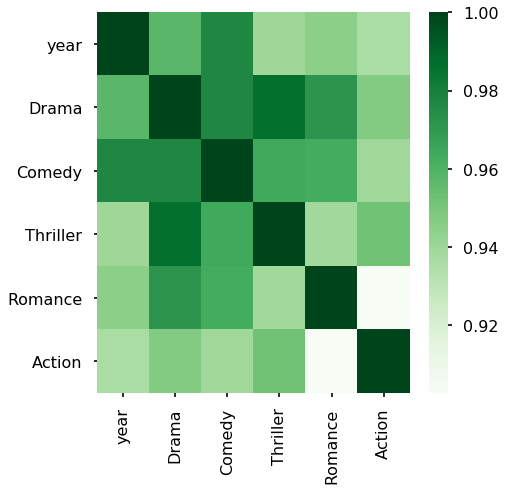

In [63]:
import seaborn as sns

plt.figure(figsize=(7,7))
sns.heatmap(by_year.corr(), cmap="Greens")

## Are Different Years Happier?

One though I had while seeing such a high number of comedy movies, is to see if there are different years that had higher rated comedies movies correlating to potentially "happier" people? :) 

* The first thing we'll do is create a table of the movies that we'll join with the ratings
* Then we'll create a filter that will remove any films that are not comedy

In [110]:
comedy_movies = movies.drop(columns=(['genres', 'Drama', 'Thriller', 'Romance', 'Action']))
comedy_movies.head()

,movieId,title,year,Comedy
0,1,Toy Story (1995),1995.0,True
1,2,Jumanji (1995),1995.0,False
2,3,Grumpier Old Men (1995),1995.0,True
3,4,Waiting to Exhale (1995),1995.0,True
4,5,Father of the Bride Part II (1995),1995.0,True


In [111]:
filter = comedy_movies['Comedy'] == True
comedy_movies = comedy_movies[filter]
comedy_movies.head()

,movieId,title,year,Comedy
0,1,Toy Story (1995),1995.0,True
2,3,Grumpier Old Men (1995),1995.0,True
3,4,Waiting to Exhale (1995),1995.0,True
4,5,Father of the Bride Part II (1995),1995.0,True
6,7,Sabrina (1995),1995.0,True


### Bring in the Ratings Database

Next, create a table of the average ratings

*Let's start by checking out the ratings distribution*

In [112]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

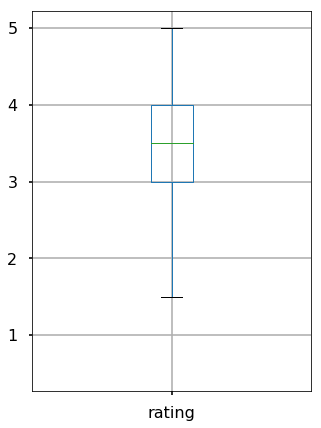

In [82]:
ratings.boxplot(column='rating', figsize=(5,7))

### Get the Average Ratings by Movie-ID

In [105]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


### Join the Tables

comedy_movies & average_rating

In [106]:
joined = comedy_movies.merge(average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,year,Comedy,rating
0,1,Toy Story (1995),1995.0,True,3.921240
1,2,Jumanji (1995),1995.0,True,3.211977
2,3,Grumpier Old Men (1995),1995.0,True,3.151040
3,4,Waiting to Exhale (1995),1995.0,True,2.861393
4,5,Father of the Bride Part II (1995),1995.0,True,3.064592


In [107]:
comedy_average = joined[['year','rating']].groupby('year', as_index=False).mean()
comedy_average = comedy_average[-41:-2]
comedy_average.head()

,year,rating
77,1975.0,3.149894
78,1976.0,3.166769
79,1977.0,3.129849
80,1978.0,3.156640
81,1979.0,3.076572


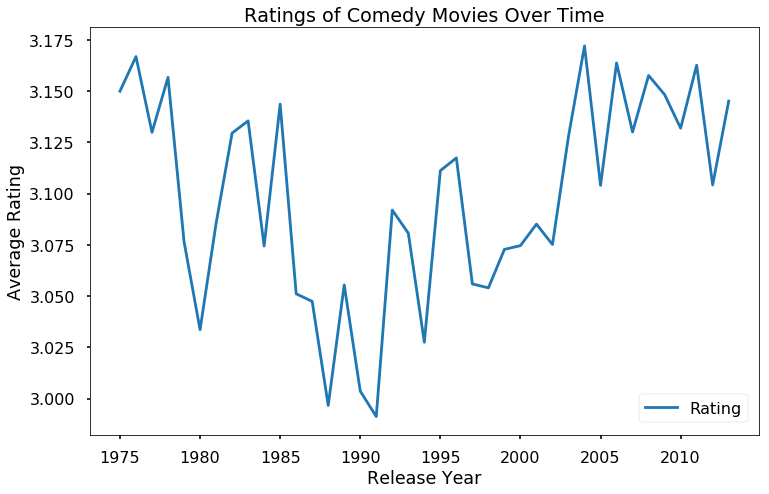

In [108]:
# comedy_average.plot(x='year', y='rating', figsize=(15,10), grid=True)

plt.figure(figsize=(12, 7.5))
# print(plt.style.available)
plt.style.use('seaborn-poster')

# Leave the first row uncommented if you want to display the total
plt.plot(comedy_average['year'], comedy_average['rating'], label='Rating')

plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.title("Ratings of Comedy Movies Over Time")

plt.legend(bbox_to_anchor=(0.82, .1), loc=2, borderaxespad=0.)


plt.show()

# ToDo: Add another axis of count of comedies produced